# Compressed Sensing: Application à l'IRM
    GARNIER Rémy (M2 StatML), NGUYEN Dinh-Phong (M2 Data Science)

In [20]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Incohérence

On explore l'importance de l'incohérence des vecteurs de mesure. Générons un vecteur $x$ de longueur 128 avec 5 coefficients non-nuls positionnés aléatoirement, représentant un signal quelconque 5-sparse.

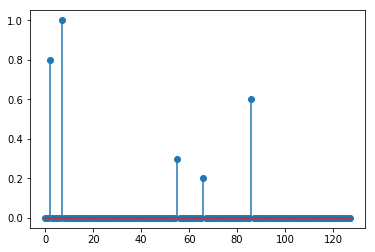

In [38]:
x = np.array([0.2, 0.3, 0.6, 0.8, 1.] + [0] * 123)
np.random.shuffle(x)
plt.stem(x);

Prenons la transformation de Fourier discrète de ce vecteur, $X = Fx$, où $F$ représente la matrice de Vandermonde-Fourier:

In [39]:
X = np.fft.fft(x)

L'objectif principal du compressed sensing est de pouvoir reconstruire le signal d'origine à partir d'une "information incomplète" (nombre de mesures limité) sur celui-ci. Il est en général impossible de reconstruire $x$ uniquement à partir des coefficients de Fourier car la transformée de Fourier est une bijection de $\mathbb{C}^N$. Néanmoins, si l'on sait que le signal d'origine $x$ est $s$-sparse, on se trouve bien dans le cadre du compressed sensing.

Prenons alors un sous-échantillon $X_u = F_u x$ de $X$, où $F_u$ est une matrice de Vandermonde-Fourier évaluée sur seulement une partie du domaine de fréquences. Nous allons comparer deux cas de sous-échantillonage dans le domaine de Fourier:

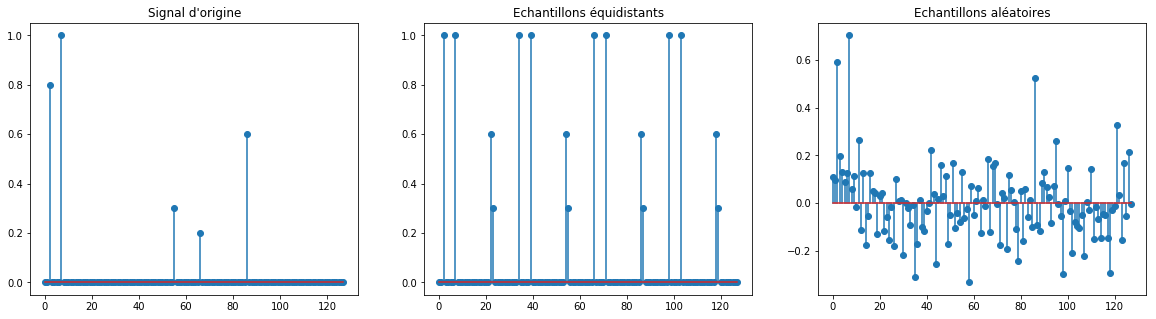

In [54]:
Xu = np.zeros(128, dtype='complex')
Xu[::4] = X[::4]

Xr = np.zeros(128, dtype='complex')
sample_idx = np.random.choice(128, 32)
Xr[sample_idx] = X[sample_idx]

# Transformée inverse
xu = np.fft.ifft(Xu) * 4
xr = np.fft.ifft(Xr) * 4

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].stem(x)
ax[0].set_title('Signal d\'origine')
ax[1].stem(xu)
ax[1].set_title('Echantillons équidistants')
ax[2].stem(xr)
ax[2].set_title('Echantillons aléatoires');